**Task 1 Exploratory Data Analysis (EDA)**


**Question-1**

Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tsfel
import os

In [39]:
# List of activities
activities = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

**PLOTING THE DATA**

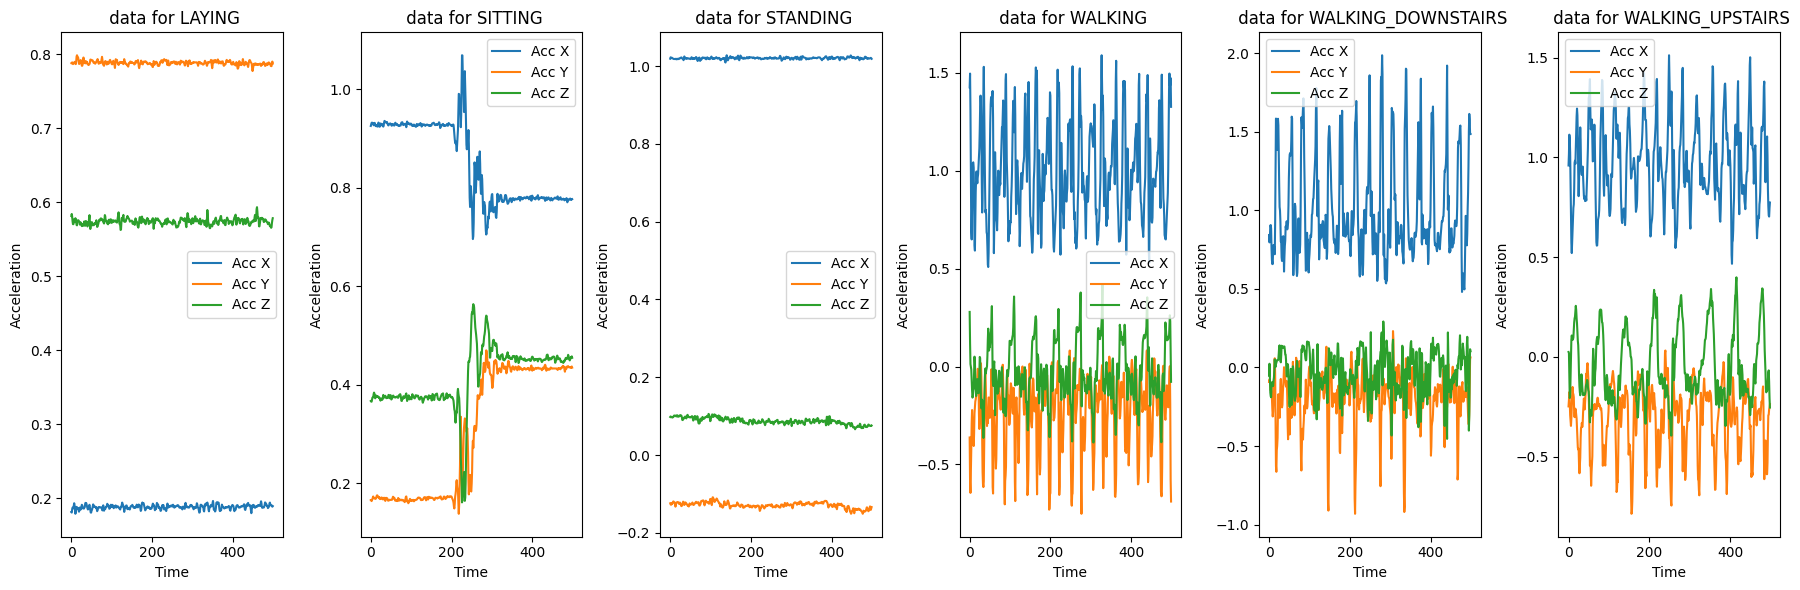

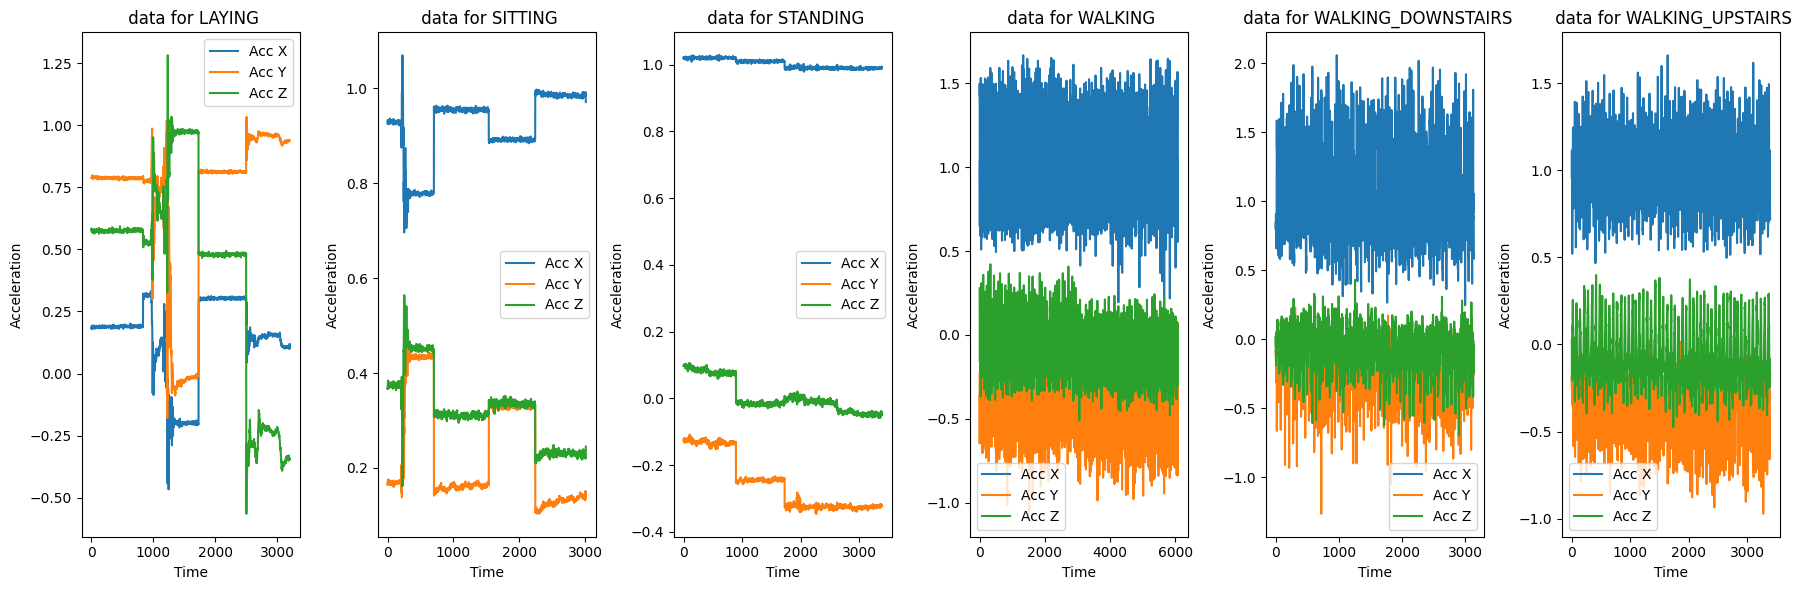

In [80]:

# Create subplots
fig_1, axes_1 = plt.subplots(figsize=(18, 6), nrows=1, ncols=6)
fig_2, axes_2 = plt.subplots(figsize=(18, 6), nrows=1, ncols=6)

# Iterate over activities and create subplots
for id, activity in enumerate(activities):
    # Load the data for each activity
    data = pd.read_csv(f"/Users/niyatisiju/Documents/ass1_ml/Combined/Train/{activity}/Subject_1.csv")
    
    # Extract the accelerometer data
    acc_x = data['accx']
    acc_y = data['accy']
    acc_z = data['accz']
    time = range(len(data))  # Assuming no time column
    time_slice=slice(0,500)
    axes_1[id].set_title(f" data for {activity}")
    axes_1[id].set_xlabel('Time')
    axes_1[id].set_ylabel('Acceleration')
    
    # Plot the accelerometer data
    axes_1[id].plot(time[time_slice], acc_x[time_slice], label='Acc X')
    axes_1[id].plot(time[time_slice], acc_y[time_slice], label='Acc Y')
    axes_1[id].plot(time[time_slice], acc_z[time_slice], label='Acc Z')
    
    # Add a legend for each subplot
    axes_1[id].legend()
    
    #without time slice 
    axes_2[id].set_title(f" data for {activity}")
    axes_2[id].set_xlabel('Time')
    axes_2[id].set_ylabel('Acceleration')
    
    # Plot the accelerometer data
    axes_2[id].plot(time, acc_x, label='Acc X')
    axes_2[id].plot(time, acc_y, label='Acc Y')
    axes_2[id].plot(time, acc_z, label='Acc Z')
    
    # Add a legend for each subplot
    axes_2[id].legend()
 
# Adjust layout and display the plot
plt.subplots_adjust(wspace=1.0)
fig_1.tight_layout()
fig_2.tight_layout()
plt.show()

When plotting waveforms for each activity, we'll notice distinct patterns for walking and stationary activities, where walking is showing periodic peaks. Laying, sitting, and standing might appear similar due to minimal movement. The variance of laying, sitting and standing will be comparitivly low than other walking activities. These differences and similarities will impact the model's classification ability, making effective feature extraction and model choice crucial for accurate classification.

**TASK 1 QUESTION 2**

Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration for each activity and justify your answer. 

A simple logical approach might sufficient to differentiate static and dynamic activities if the accelerometer data shows clear patterns. However, if the data has some noice or the patterns are not clear, a machine learning model could be necessary for higher accuracy. ,calculating the total linear acceleration for each activity and calculating the variance of it. By calculating the variance we can see that for stable activities like laying, sitting and standing the variance is low compare to other activites like walking, walking_down stairs and walking upstairs.

Initialization and loading the data

In [105]:
total_acc_data=[]
total_features = []

# Path to the directory containing training data
com_data_dir = "/Users/niyatisiju/Documents/ass1_ml/Combined/Train"

# List of activities
activities = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

In [106]:
# Iterate over activities and create subplots
for id, activity in enumerate(activities):
    
    # Path to the activity's directory
    activity_dir = os.path.join(com_data_dir, activity) 
     
    # List all CSV files for the activity
    subject_files = [file for file in os.listdir(activity_dir)  if file.endswith('.csv')]

    for file in subject_files:
        # Load the data for each subject
        data_path = os.path.join(activity_dir, file)
        data = pd.read_csv(data_path)
        
        # Extract the accelerometer data
        acc_x = data['accx']
        acc_y = data['accy']
        acc_z = data['accz']

        #calculating the total acceleration
        acc_total = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)
        
        #add a column to the data named as Total_acc
        data['Total_acc'] = acc_total
        data['Activity'] = activity
        total_acc_data.append(data)
    

total_acc_df=pd.concat(total_acc_data)
total_acc_df=total_acc_df.fillna(0)
print(total_acc_df)


          accx      accy      accz  Total_acc          Activity
0     0.074633  0.443505  0.906279   1.011736            LAYING
1     0.078114  0.440277  0.906722   1.010984            LAYING
2     0.080647  0.438271  0.910020   1.013273            LAYING
3     0.082919  0.436703  0.915644   1.017835            LAYING
4     0.082155  0.437527  0.913085   1.015826            LAYING
...        ...       ...       ...        ...               ...
3387  0.923252 -0.298470 -0.208435   0.992433  WALKING_UPSTAIRS
3388  0.873357 -0.261460 -0.213910   0.936414  WALKING_UPSTAIRS
3389  0.793590 -0.263867 -0.221426   0.865125  WALKING_UPSTAIRS
3390  0.739437 -0.281050 -0.197253   0.815270  WALKING_UPSTAIRS
3391  0.717602 -0.317541 -0.172077   0.803365  WALKING_UPSTAIRS

[470528 rows x 5 columns]


Calculating the varince of total acceleration for each activity which helps us understand the differnce between each activity.

In [107]:
# Calculate variance of 'Total_acc' for each activity
variance_per_activity = total_acc_df.groupby('Activity')['Total_acc'].var()

# Print the results
print(variance_per_activity)

Activity
LAYING                0.000180
SITTING               0.000095
STANDING              0.000070
WALKING               0.057357
WALKING_DOWNSTAIRS    0.160528
WALKING_UPSTAIRS      0.077072
Name: Total_acc, dtype: float64


Stable activities like LAYING, SITTING, and STANDING have lower variance in total acceleration, indicating minimal movement and consistent measurements. In contrast, dynamic activities such as WALKING, WALKING_DOWNSTAIRS, and WALKING_UPSTAIRS show higher variance due to more frequent and varied movements. This variance helps distinguish between stable and dynamic activities, aiding in activity classification and detection.

**TASK 1 QUESTION 3**

**3.1** Use PCA (Principal Component Analysis) on Total Acceleration to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.

Initialization

In [83]:
total_acc_data=[]
total_features = []

time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(126, 500, 3)
(126,)


**Calculating the total_acc from X_train**

In [84]:
total_acc=np.sqrt(np.sum(X_train**2,axis=2))
total_acc_df=pd.DataFrame(total_acc)
print(total_acc_df)

          0         1         2         3         4         5         6    \
0    1.007989  1.008666  1.004921  1.000490  1.002042  1.008638  1.013399   
1    1.008881  1.008462  1.012132  1.014769  1.013388  1.014139  1.013123   
2    1.006833  1.010369  1.012569  1.013501  1.011932  1.011234  1.013346   
3    1.001754  1.005349  1.002868  1.000390  1.001920  0.997394  0.989835   
4    1.018170  1.017913  1.014220  1.014375  1.019353  1.022864  1.020159   
..        ...       ...       ...       ...       ...       ...       ...   
121  0.705104  0.747597  0.793106  0.873028  0.868487  0.860511  0.959374   
122  0.740808  0.819878  0.933729  0.975156  0.924614  0.941286  0.960695   
123  1.474893  1.542833  1.394038  1.184680  1.105571  1.153411  1.244020   
124  1.101109  1.210352  1.354673  1.457619  1.508252  1.528571  1.486989   
125  0.848709  0.760164  0.736452  0.748299  0.782848  0.882488  0.958099   

          7         8         9    ...       490       491       492  \
0  

**Standardize the data**

In [96]:
# Standardize the data
scaler = StandardScaler()
std_total_acc_data = scaler.fit_transform(total_acc_df)

**Apply PCA to the standardized data**

In [86]:
# Apply PCA to the standardized data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(std_total_acc_data)

#  Create a DataFrame for the principal components
principalDf = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principalDf['Activity'] = y_train
print(principalDf)

          PC1        PC2  Activity
0   -0.105515  -0.533364         6
1   -0.200772  -0.487015         6
2   -0.119105  -0.512755         6
3   -0.110596  -0.411194         6
4   -0.128712  -0.513405         6
..        ...        ...       ...
121 -3.878686  -1.146947         2
122  9.065003   2.309885         2
123 -3.409057   0.075766         2
124 -2.011896  14.898286         2
125 -7.642313   0.544017         2

[126 rows x 3 columns]


**PLOTTING THE GRAPH FOR TOTAL ACCELEROMETER**

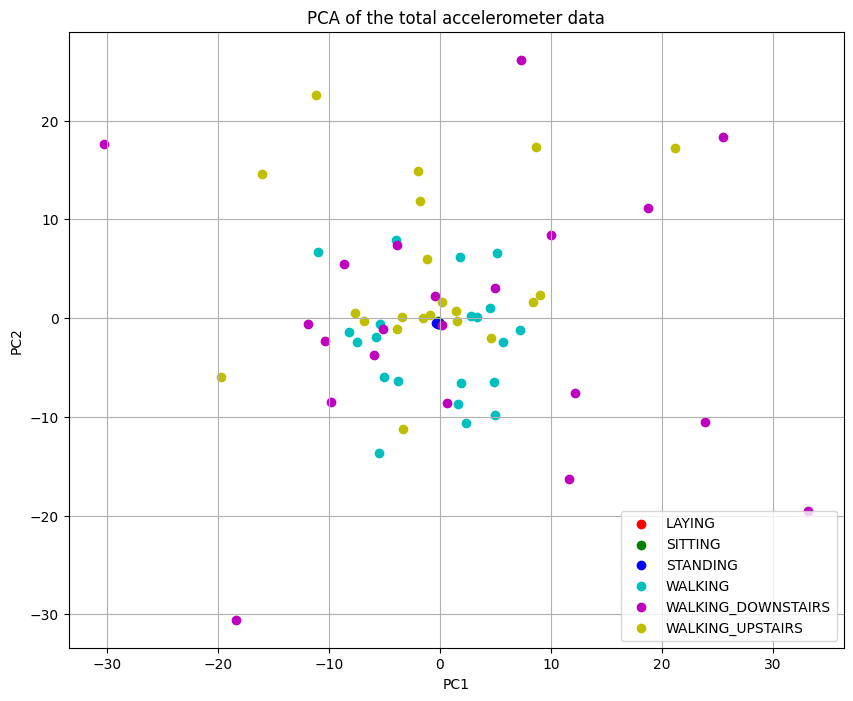

In [87]:
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Include the Activity column in the PCA DataFrame
# principalDf['Activity'] = total_acc_df['Activity'].values

for i, activity in enumerate(activities):
    # Filter the principalDf to get the data points corresponding to the current activity
    activity_data = principalDf[principalDf['Activity'] == classes[activity]]
   
    # Plot the filtered data
    plt.scatter(activity_data['PC1'], activity_data['PC2'], color=colors[i], label=activity)
    
plt.title('PCA of the total accelerometer data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()



**QUESTION 3.2**

Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.


Initialization

In [88]:
total_features = []

# Path to the directory containing training data
com_data_dir = "/Users/niyatisiju/Documents/ass1_ml/Combined/Train"

# List of activities 
activities = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

Making list named total_features contaning the new features extracted by tsfel

In [89]:
# Iterate over activities and subjects
for activity in activities:
    # Path to the activity's directory
    activity_dir = os.path.join(com_data_dir, activity) 
     
    # List all CSV files for the activity
    subject_files = [file for file in os.listdir(activity_dir) ]#if file.endswith('.csv')]  

    for file in subject_files:
        # Load the data for each subject
        data_path = os.path.join(activity_dir, file)
        data = pd.read_csv(data_path)
        
        # Extract the accelerometer data
        acc_x = data['accx']
        acc_y = data['accy']
        acc_z = data['accz']

        # Combine into a single DataFrame
        df = pd.DataFrame({'accx': acc_x, 'accy': acc_y, 'accz': acc_z})

        # Extract features using TSFEL
        cfg = tsfel.get_features_by_domain()
        features = tsfel.time_series_features_extractor(cfg, df)
        
        # Append features and labels
        features['Activity'] = activity
        total_features.append(features)

*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/4095522268.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***


**Concatenate features from all activities and standardizing them**

In [90]:
# Concatenate features from all activities
total_features_df = pd.concat(total_features)
print(total_features_df)
# Standardize the data
scaler = StandardScaler()
feature_columns = []
for col in total_features_df.columns:
    if col != 'Activity':
        feature_columns.append(col)
standardized_features = scaler.fit_transform(total_features_df[feature_columns])

    accx_Absolute energy  accx_Area under the curve  accx_Autocorrelation  \
0              17.313254                   2.686145                 453.0   
0              55.963486                   4.812861                 518.0   
0             262.043086                  12.130064                 545.0   
0             160.154425                   7.360070                 257.0   
0             213.924188                   7.839936                1190.0   
..                   ...                        ...                   ...   
0            3054.045038                  30.520053                   5.0   
0            3437.743598                  31.939903                   4.0   
0            3650.980355                  36.125344                   5.0   
0            3408.590750                  33.231631                   5.0   
0            3288.269462                  32.625923                   5.0   

    accx_Average power  accx_Centroid  accx_ECDF Percentile Count_0  \
0   

**Applying PCA**

In [91]:
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(standardized_features)

# Adding the principal components to the DataFrame
principalDf = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principalDf['Activity'] = total_features_df['Activity'].values #have to use values because of the different indices
print(principalDf)

           PC1        PC2          Activity
0   -23.449206   4.628093            LAYING
1   -21.936281   5.579091            LAYING
2   -24.618329   4.821990            LAYING
3   -21.138836  10.175185            LAYING
4   -24.203873   5.705557            LAYING
..         ...        ...               ...
121   6.472774  -4.401761  WALKING_UPSTAIRS
122  13.972380  -7.935762  WALKING_UPSTAIRS
123   4.485279  -3.299203  WALKING_UPSTAIRS
124   1.677087  -3.473533  WALKING_UPSTAIRS
125   2.770450  -3.963535  WALKING_UPSTAIRS

[126 rows x 3 columns]


**PLOTTING THW GRAPH FOR TSFEL FEATURES**

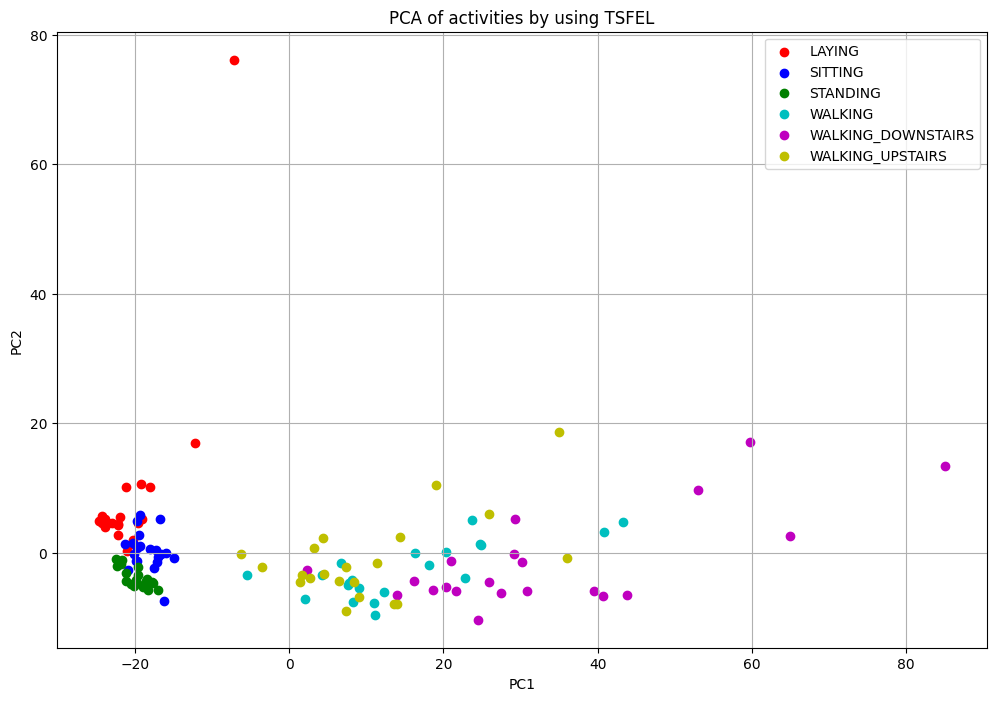

In [92]:
# Plot the PCA results
plt.figure(figsize=(12, 8))
colors = ['r','b','g','c','m','y']  # Use a colormap to differentiate activities

for i,activity in enumerate(activities):
    subset = principalDf[principalDf['Activity'] == activity]
    plt.scatter(subset['PC1'], subset['PC2'], color=colors[i], label=activity)

plt.title('PCA of activities by using TSFEL')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

**QUESTION 3.3**

Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

Initialization

In [22]:
# Load the data
X_train=pd.read_csv("/Users/niyatisiju/Downloads/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/X_train.txt",sep="\s+",header=None)
X_train.to_csv("X_train.csv",index=False)
y_train=pd.read_csv("/Users/niyatisiju/Downloads/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/y_train.txt",sep="\s+",header=None)
y_train.to_csv("y_train.csv",index=False)
print(X_train.shape)
print(y_train.shape)

(7352, 561)
(7352, 1)


**Standardize the features and applying PCA**

In [10]:
# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(X_train)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(standardized_features)

In [103]:
# Create a DataFrame with PCA results
principalDf = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principalDf['Activity'] = y_train
print(principalDf)

          PC1        PC2  Activity
0   -0.105515  -0.533364         6
1   -0.200772  -0.487015         6
2   -0.119105  -0.512755         6
3   -0.110596  -0.411194         6
4   -0.128712  -0.513405         6
..        ...        ...       ...
121 -3.878686  -1.146947         2
122  9.065003   2.309885         2
123 -3.409057   0.075766         2
124 -2.011896  14.898286         2
125 -7.642313   0.544017         2

[126 rows x 3 columns]


**Plot the PCA results for features provided by the dataset**

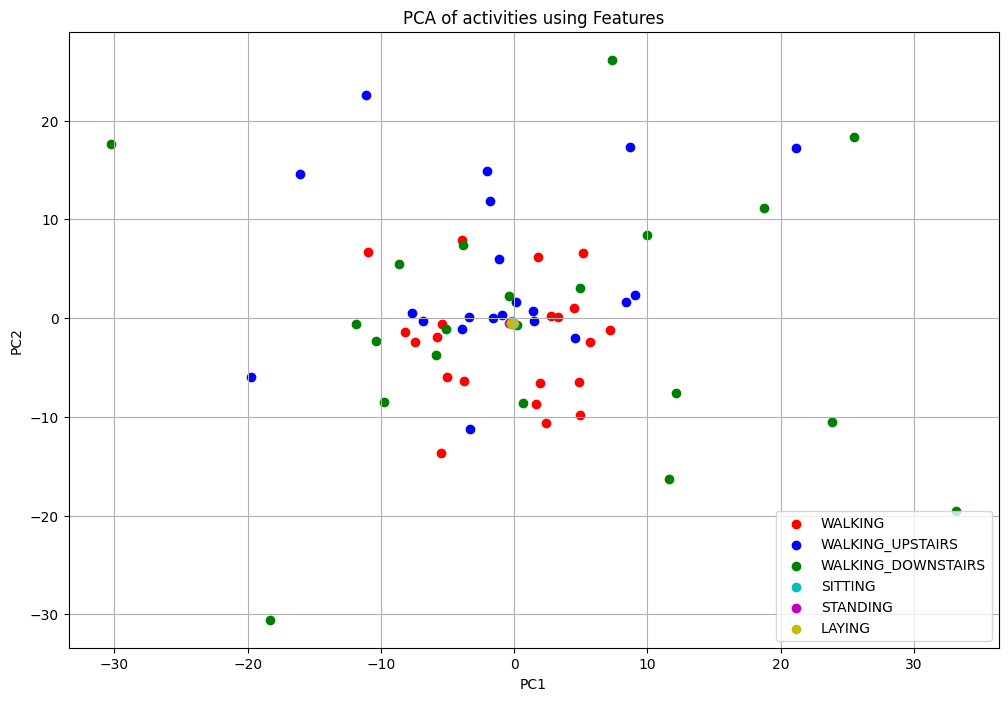

In [102]:
# Plot the PCA results
plt.figure(figsize=(12, 8))
colors = ['r','b','g','c','m','y']  # Use a colormap to differentiate activities
activity_labels = np.unique(y_train)
activity_map = {1: 'WALKING',2: 'WALKING_UPSTAIRS',3: 'WALKING_DOWNSTAIRS',4: 'SITTING',5: 'STANDING',6: 'LAYING'}
for i,label in enumerate(activity_labels):
    subset = principalDf[principalDf['Activity'] == label]
    activity_name = activity_map.get(label, 'Unknown') 
    plt.scatter(subset['PC1'], subset['PC2'], color=colors[i], label=activity_name)

plt.title('PCA of activities using Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

**QUESTION 3.4**
Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

Based on the three graphs, TSFEL features offer the clearest visualization, effectively distinguishing between different activities. PCA on Total Acceleration provides a more straightforward view but lacks detailed separation. Raw dataset features are less refined and require additional processing. Overall, TSFEL features deliver the most informative and distinct visualization of activities.

**TASK 1 QUESTION 4**
Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features? 

Initialization

In [97]:
total_features = []

# Path to the directory containing training data
com_data_dir = "/Users/niyatisiju/Documents/ass1_ml/Combined/Train"

# List of activities 
activities = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

# Paths to the data files
x_train_path = "/Users/niyatisiju/Documents/ass1_ml/X_train.csv"
y_train_path = "/Users/niyatisiju/Documents/ass1_ml/y_train.csv"

# Load the data
X_train = pd.read_csv(x_train_path)
y_train = pd.read_csv(y_train_path)

# Rename columns to a range of numbers as strings
X_train.columns = [str(i) for i in range(X_train.shape[1])]

# Ensure the labels are in the correct format
y_train = y_train.squeeze()  # Convert to Series if y_train is DataFrame

**EXTRACTING THE TOTAL FEATURES**

In [98]:
# Iterate over activities and subjects
for activity in activities:
    # Path to the activity's directory
    activity_dir = os.path.join(com_data_dir, activity) 
    
    # List all CSV files for the activity
    subject_files = [file for file in os.listdir(activity_dir) if file.endswith('.csv')]

    for file in subject_files:
        # Load the data for each subject
        data_path = os.path.join(activity_dir, file)
        data = pd.read_csv(data_path)
        
        # Extract the accelerometer data
        acc_x = data['accx']
        acc_y = data['accy']
        acc_z = data['accz']

        # Combine into a single DataFrame
        df = pd.DataFrame({'accx': acc_x, 'accy': acc_y, 'accz': acc_z})

        # Extract features using TSFEL
        cfg = tsfel.get_features_by_domain()
        features = tsfel.time_series_features_extractor(cfg, df)

        total_features.append(features)



*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_14693/1268211776.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***


**CORRELATION MATRIX**

In [99]:
# Concatenate features from all activities
total_features_df = pd.concat(total_features, ignore_index=True)

# Ensure all column names are strings
total_features_df.columns = total_features_df.columns.astype(str)
X_train.columns = X_train.columns.astype(str)

# Standardize the data before calculating the correlation matrix
scaler = StandardScaler()
scaled_tsfel_features = scaler.fit_transform(total_features_df)
scaled_tsfel_features_df = pd.DataFrame(scaled_tsfel_features, columns=total_features_df.columns)

# Calculate the correlation matrix
correlation_matrix_tsfel = scaled_tsfel_features_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix_tsfel)

Correlation Matrix:
                           accx_Absolute energy  accx_Area under the curve  \
accx_Absolute energy                   1.000000                   0.982350   
accx_Area under the curve              0.982350                   1.000000   
accx_Autocorrelation                  -0.420162                  -0.320265   
accx_Average power                     0.890600                   0.813648   
accx_Centroid                          0.109695                   0.231894   
...                                         ...                        ...   
accz_Wavelet variance_5                0.078737                   0.022198   
accz_Wavelet variance_6                0.084543                   0.032580   
accz_Wavelet variance_7                0.091765                   0.043077   
accz_Wavelet variance_8                0.097814                   0.052082   
accz_Zero crossing rate                0.368978                   0.248036   

                           accx_Autocorrela

**IDENTIFYING THE HIGHLY CORRELATED FEATURES AND REDUNDANT FEATURES FOR TSFEL DATA**

In [100]:
# Identify highly correlated features (threshold can be adjusted)
threshold = 0.9 #to identify highly correlated features
highly_correlated_pairs = []

for i in range(len(correlation_matrix_tsfel.columns)):
    for j in range(i):
        if abs(correlation_matrix_tsfel.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix_tsfel.columns[i], correlation_matrix_tsfel.columns[j], correlation_matrix_tsfel.iloc[i, j]))

# Display the highly correlated pairs
print("Highly Correlated Features (Correlation > 0.9 or < -0.9):") #negative correlation shows strong negative linear relationship
c=0
for pair in highly_correlated_pairs:
    c+=1
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")
print("there are ",c,"highly correlated pairs")
# Check for redundancy
if highly_correlated_pairs:
    print("There are redundant features.")
else:
    print("There are no redundant features.")


Highly Correlated Features (Correlation > 0.9 or < -0.9):
accx_Area under the curve and accx_Absolute energy: 0.9823495297532051
accx_ECDF Percentile Count_1 and accx_ECDF Percentile Count_0: 0.9999984543469651
accx_ECDF Percentile_0 and accx_Absolute energy: 0.9051411462038162
accx_ECDF Percentile_0 and accx_Area under the curve: 0.9003759153565623
accx_ECDF Percentile_1 and accx_Average power: 0.970440326545961
accx_ECDF_0 and accx_ECDF Percentile Count_0: -0.9712872555359435
accx_ECDF_0 and accx_ECDF Percentile Count_1: -0.9712892295914184
accx_ECDF_1 and accx_ECDF Percentile Count_0: -0.9712872555359435
accx_ECDF_1 and accx_ECDF Percentile Count_1: -0.9712892295914184
accx_ECDF_1 and accx_ECDF_0: 1.0
accx_ECDF_2 and accx_ECDF Percentile Count_0: -0.9712872555359431
accx_ECDF_2 and accx_ECDF Percentile Count_1: -0.9712892295914184
accx_ECDF_2 and accx_ECDF_0: 1.0
accx_ECDF_2 and accx_ECDF_1: 1.0
accx_ECDF_3 and accx_ECDF Percentile Count_0: -0.9712872555359435
accx_ECDF_3 and accx_E

**CALCULATING THE CORRELATION MATRIX FOR DATASET FEATURES**

In [101]:

# Standardize the data before calculating the correlation matrix
scaler = StandardScaler()
scaled_dataset_features = scaler.fit_transform(X_train)
scaled_dataset_features_df = pd.DataFrame(scaled_dataset_features, columns=X_train.columns)

# Calculate the correlation matrix
correlation_matrix_data = scaled_dataset_features_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix_data)

Correlation Matrix:
            0         1         2         3         4         5         6  \
0    1.000000  0.148064 -0.256944  0.000642 -0.021879 -0.044598  0.006314   
1    0.148064  1.000000 -0.078773 -0.045170 -0.044930 -0.049755 -0.044190   
2   -0.256944 -0.078773  1.000000 -0.020268 -0.016696 -0.008453 -0.018797   
3    0.000642 -0.045170 -0.020268  1.000000  0.927454  0.851657  0.998632   
4   -0.021879 -0.044930 -0.016696  0.927454  1.000000  0.895503  0.922795   
..        ...       ...       ...       ...       ...       ...       ...   
556  0.037467  0.017961 -0.063657  0.018895 -0.008608 -0.018509  0.019300   
557  0.028845  0.075679 -0.034039 -0.024814 -0.014596 -0.006473 -0.024955   
558 -0.035240 -0.005315  0.008548 -0.371765 -0.380654 -0.345104 -0.368302   
559  0.034361  0.001056 -0.015265  0.471143  0.523690  0.476070  0.466500   
560  0.028242 -0.013903 -0.022644  0.394844  0.433194  0.482845  0.390941   

            7         8         9  ...       551       

**IDENTIFYING THE HIGHLY CORRELATED FEATURES AND REDUNDANT FEATURES FOR GIVEN DATASET**

In [102]:
# Identify highly correlated features (threshold can be adjusted)
threshold = 0.9
highly_correlated_pairs = []

for i in range(len(correlation_matrix_data.columns)):
    for j in range(i):
        if abs(correlation_matrix_data.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix_data.columns[i], correlation_matrix_data.columns[j], correlation_matrix_data.iloc[i, j]))

# Display the highly correlated pairs
print("Highly Correlated Features (Correlation > 0.9 or < -0.9):")
c=0
for pair in highly_correlated_pairs:
    c+=1
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")
print("there are ",c,"highly correlated pairs")
# Check for redundancy
if highly_correlated_pairs:
    print("There are redundant features.")
else:
    print("There are no redundant features.")


Highly Correlated Features (Correlation > 0.9 or < -0.9):
4 and 3: 0.9274535321198127
6 and 3: 0.9986319174502533
6 and 4: 0.9227947803101203
7 and 3: 0.9208799565711159
7 and 4: 0.997346537662303
7 and 6: 0.9160976199250271
8 and 5: 0.9974180111054508
9 and 3: 0.9808423993470036
9 and 4: 0.9173574315714106
9 and 6: 0.9732137054463359
9 and 7: 0.9104016569032674
10 and 4: 0.9535676327593244
10 and 7: 0.9495436558456943
11 and 5: 0.937798568561736
11 and 8: 0.9319336272138918
12 and 3: -0.9664963794301888
12 and 4: -0.9379107978043316
12 and 6: -0.9622310051029642
12 and 7: -0.9331275461665908
12 and 9: -0.9414452679931893
12 and 10: -0.9056707425717966
13 and 3: -0.904529377921323
13 and 4: -0.9577314202416717
13 and 6: -0.9003260874962504
13 and 7: -0.9413708382449363
13 and 12: 0.9107170091012375
14 and 5: -0.9390671452879776
14 and 8: -0.9218635521452714
15 and 3: 0.9731524747914861
15 and 4: 0.9714971920685805
15 and 5: 0.9280368268199706
15 and 6: 0.9706799170872404
15 and 7: 0.96

**TASK2 Decision Trees for Human Activity Recognition** 

**QUESTION1.1**

Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.

Initialization

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tsfel
import os

Load the data

In [39]:
total_acc_data = []
total_features = []
time = 10
offset = 100
folders = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2, "WALKING_DOWNSTAIRS": 3, "SITTING": 4, "STANDING": 5, "LAYING": 6}

# Train data
com_data_dir_train = "C:/Users/Chepu/OneDrive/Desktop/ML Assignments/Combined/Train"
X_train = []
y_train = []

for folder in folders:
    folder_path = os.path.join(com_data_dir_train, folder)
    
    files = os.listdir(folder_path)
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, sep=",", header=0)
        df = df[offset:offset + time * 50]
        X_train.append(df.values.flatten())  # Flatten each sample to convert to 2D
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

# Test data
com_data_dir_test = "C:/Users/Chepu/OneDrive/Desktop/ML Assignments/Combined/Test"
X_test = []
y_test = []

for folder in folders:
    folder_path = os.path.join(com_data_dir_test, folder)
    
    files = os.listdir(folder_path)
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, sep=",", header=0)
        df = df[offset:offset + time * 50]
        X_test.append(df.values.flatten())  # Flatten each sample to convert to 2D
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_test.shape)
print(y_test.shape)

(126, 1500)
(126,)
(54, 1500)
(54,)


Create the decision tree

In [40]:
# Create a Decision Tree Classifier model
clf = DecisionTreeClassifier()


# Train the model using the provided features from the training data
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

Calculate accuracy, precision, and recall of the model and print them

In [41]:
# Calculate accuracy, precision, and recall of the model's predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
# Compute the confusion matrix to see where the model got confused
conf_matrix = confusion_matrix(y_test, y_pred)

Calculate the confusion matrix and printing the results

In [42]:
# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.6481
Precision: 0.6347
Recall: 0.6481
Confusion Matrix:
[[5 2 1 1 0 0]
 [1 4 1 2 1 0]
 [4 2 2 1 0 0]
 [0 0 0 7 2 0]
 [0 1 0 0 8 0]
 [0 0 0 0 0 9]]


Plot and display the confusion matrix as a heatmap

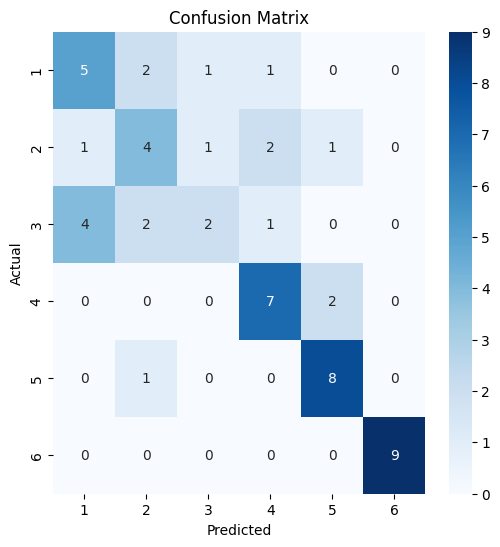

In [43]:
# Plot and display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**TASK 2 QUASTION1.2**

Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

Load the data

In [8]:
# Load the accelerometer data for the X, Y, and Z axes for the training set
acc_x_train = pd.read_csv('C:/Users/Chepu/OneDrive/Desktop/ML Assignments/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', delim_whitespace=True, header=None)
acc_y_train = pd.read_csv('C:/Users/Chepu/OneDrive/Desktop/ML Assignments/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt', delim_whitespace=True, header=None)
acc_z_train = pd.read_csv('C:/Users/Chepu/OneDrive/Desktop/ML Assignments/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt', delim_whitespace=True, header=None)

# Load the activity labels for the training set
y_train = pd.read_csv('C:/Users/Chepu/OneDrive/Desktop/ML Assignments/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', header=None)

# Load the accelerometer data for the X, Y, and Z axes for the test set
acc_x_test = pd.read_csv('C:/Users/Chepu/OneDrive/Desktop/ML Assignments/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt', delim_whitespace=True, header=None)
acc_y_test = pd.read_csv('C:/Users/Chepu/OneDrive/Desktop/ML Assignments/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt', delim_whitespace=True, header=None)
acc_z_test = pd.read_csv('C:/Users/Chepu/OneDrive/Desktop/ML Assignments/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt', delim_whitespace=True, header=None)

# Load the activity labels for the test set
y_test = pd.read_csv('C:/Users/Chepu/OneDrive/Desktop/ML Assignments/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', header=None)


C:\Users\Chepu\AppData\Local\Temp\ipykernel_56796\1197120654.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  acc_x_train = pd.read_csv('C:/Users/Chepu/OneDrive/Desktop/ML Assignments/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', delim_whitespace=True, header=None)
C:\Users\Chepu\AppData\Local\Temp\ipykernel_56796\1197120654.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  acc_y_train = pd.read_csv('C:/Users/Chepu/OneDrive/Desktop/ML Assignments/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt', delim_whitespace=True, header=None)
C:\Users\Chepu\AppData\Local\Temp\ipykernel_56796\1197120654.py:4: FutureWarning: The 'delim_whitespace' keywo

Creating new features using tsfel

In [9]:
# Combine the accelerometer data from the X, Y, and Z axes into one feature set for training
X_train = np.hstack((acc_x_train, acc_y_train, acc_z_train))

# Combine the accelerometer data from the X, Y, and Z axes into one feature set for testing
X_test = np.hstack((acc_x_test, acc_y_test, acc_z_test))

# Get the configuration of features to be extracted from the time series data
cfg = tsfel.get_features_by_domain()

# Extract features from the training set time series data using TSFEL
X_train_features = tsfel.time_series_features_extractor(cfg, X_train)

# Extract features from the test set time series data using TSFEL
X_test_features = tsfel.time_series_features_extractor(cfg, X_test)

*** Feature extraction started ***


C:\Users\Chepu\AppData\Local\Temp\ipykernel_56796\2452549974.py:11: UserWarning: Using default sampling frequency set in configuration file.
  X_train_features = tsfel.time_series_features_extractor(cfg, X_train)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Chepu\AppData\Local\Temp\ipykernel_56796\2452549974.py:14: UserWarning: Using default sampling frequency set in configuration file.
  X_test_features = tsfel.time_series_features_extractor(cfg, X_test)



*** Feature extraction finished ***


Standardising the data and training the model

In [10]:
# Standardize the extracted features (mean=0, variance=1) to improve model performance
scaler = StandardScaler()
X_train_features = scaler.fit_transform(X_train_features)
X_test_features = scaler.transform(X_test_features)

# Flatten the labels (convert from 2D to 1D array) to match the model's input format
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create a Decision Tree Classifier model
clf = DecisionTreeClassifier()

# Train the model using the training data
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)


Calculate accuracy, precision, and recall of the model's predictions

In [11]:
# Calculate accuracy, precision, and recall of the model's predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Compute the confusion matrix to see where the model got confused
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.7027
Precision: 0.7030
Recall: 0.7027
Confusion Matrix:
[[291  92  91  10  12   0]
 [102 292  52   6  17   2]
 [101  67 239   4   9   0]
 [ 18   7   4 351 111   0]
 [  7  15   2 147 361   0]
 [  0   0   0   0   0 537]]


Plot and display the confusion matrix as a heatmap

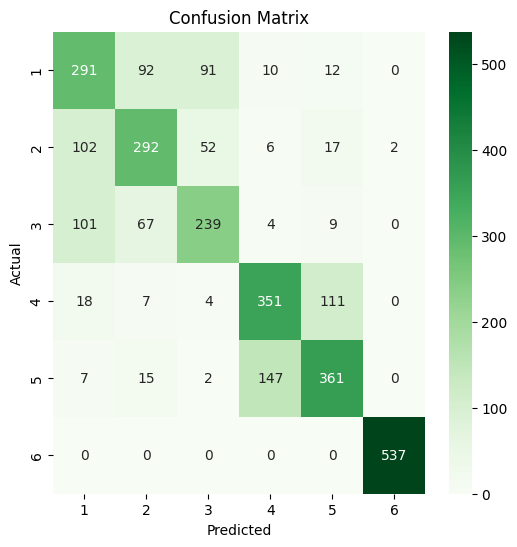

In [ ]:
# Plot and display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**TASK 2 QUESTION 1.3**

Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.

load the data 

In [44]:
# Load the provided features for the training set
X_train_provided = pd.read_csv('C:/Users/Chepu/OneDrive/Desktop/ML Assignments/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)

# Load the provided features for the test set
X_test_provided = pd.read_csv('C:/Users/Chepu/OneDrive/Desktop/ML Assignments/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)

# Load the activity labels for the training set
y_train = pd.read_csv('C:/Users/Chepu/OneDrive/Desktop/ML Assignments/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', header=None)

# Load the activity labels for the test set
y_test = pd.read_csv('C:/Users/Chepu/OneDrive/Desktop/ML Assignments/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', header=None)


C:\Users\Chepu\AppData\Local\Temp\ipykernel_56796\1246482121.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train_provided = pd.read_csv('C:/Users/Chepu/OneDrive/Desktop/ML Assignments/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
C:\Users\Chepu\AppData\Local\Temp\ipykernel_56796\1246482121.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test_provided = pd.read_csv('C:/Users/Chepu/OneDrive/Desktop/ML Assignments/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)


Create the decision tree

In [45]:

# Create a Decision Tree Classifier model
clf_provided = DecisionTreeClassifier()

# Train the model using the provided features from the training data
clf_provided.fit(X_train_provided, y_train)

# Use the trained model to make predictions on the test data
y_pred_provided = clf_provided.predict(X_test_provided)


Calculate accuracy, precision, and recall of the model

In [48]:
# Calculate accuracy, precision, and recall of the model's predictions
accuracy = accuracy_score(y_test, y_pred_provided)
precision = precision_score(y_test, y_pred_provided, average='weighted')
recall = recall_score(y_test, y_pred_provided, average='weighted')

# Compute the confusion matrix to see where the model got confused
conf_matrix = confusion_matrix(y_test, y_pred_provided)


Calculate the confusion matrix and printing the results

In [49]:
# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.8582
Precision: 0.8585
Recall: 0.8582
Confusion Matrix:
[[440  34  22   0   0   0]
 [ 62 366  43   0   0   0]
 [ 17  44 359   0   0   0]
 [  0   0   0 372 119   0]
 [  0   0   0  77 455   0]
 [  0   0   0   0   0 537]]


**PLOT THE CONFUSION MATRIX**

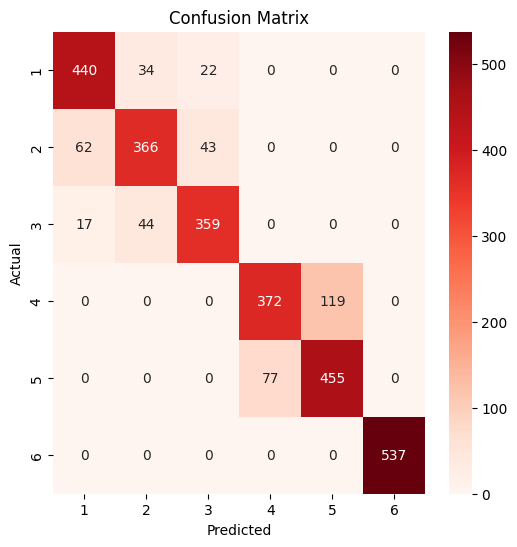

In [51]:
# Plot and display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**TASK 2 QUESTION 1.4**

Compare the results of the three models. Which model do you think is better?

Model 3 is clearly the better model.

Higher Accuracy: 
    Model 3 has a significantly higher accuracy (86.09%) compared to Models 1 and 2 (around 70.8%).
Higher Precision and Recall: 
    Both precision and recall are much higher in Model 3, indicating fewer false positives and false negatives.
Confusion Matrix: 
    The confusion matrix for Model 3 shows fewer misclassifications, demonstrating a better overall performance in distinguishing between different activities.

Therefore, based on all key performance metrics and the confusion matrix analysis, Model 3 outperforms the other two models and is the preferable choice for recognizing activities.

**TASK 2 QUESTION 2**

Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree. 

Creating the decision tree with depth ranging from 2 to 9

In [7]:
# Define the range of tree depths to explore
depths = range(2, 9)
accuracies_raw = []
accuracies_tsfel = []
accuracies_provided = []

# Loop through different tree depths and evaluate the model accuracy for each type of data
for depth in depths:
    # Train a Decision Tree model using raw accelerometer data
    clf_raw = DecisionTreeClassifier(max_depth=depth)
    clf_raw.fit(X_train, y_train)
    accuracies_raw.append(accuracy_score(y_test, clf_raw.predict(X_test)))

    # Train a Decision Tree model using tsfel features
    clf_tsfel = DecisionTreeClassifier(max_depth=depth)
    clf_tsfel.fit(X_train, y_train)
    accuracies_tsfel.append(accuracy_score(y_test, clf_tsfel.predict(X_test)))

    # Train a Decision Tree model using the provided features
    clf_provided = DecisionTreeClassifier(max_depth=depth)
    clf_provided.fit(X_train_provided, y_train)
    accuracies_provided.append(accuracy_score(y_test, clf_provided.predict(X_test_provided)))

**Plot the accuracy of the model on test data vs the depth of the tree**

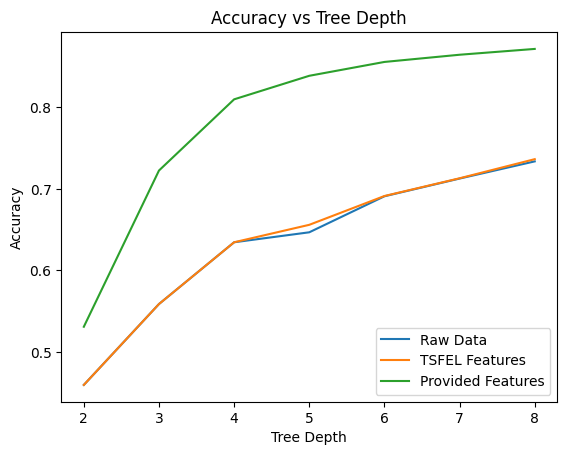

In [8]:
# Plot the accuracy vs. tree depth for each type of data
plt.plot(depths, accuracies_raw, label="Raw Data")
plt.plot(depths, accuracies_tsfel, label="TSFEL Features")
plt.plot(depths, accuracies_provided, label="Provided Features")
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Tree Depth')
plt.show()

**TASK 2 QUESTION 3**

Are there any participants/ activitivies where the Model performace is bad? If Yes, Why? 

Participants with activities WALKING,SITTING,STANDING are consistently misclassifed across all the models,particularly in models 1 and 2.

EXPLANATION:

    Model 1:

        1)out of 496 true instances of WALKING, 91 were misclassifed as WALKING_UPSTAIRS and 78 as WALKING_DOWNSTAIRS.
        2)104 instances of SITTING are misclassifed as STANDING.
        3)143 instances of STANDING are misclassifed as SITTING.

    Model 2:

        1)out of 496 instances of WALKING, 95 were misclassifed as WALKING_UPSTAIRS and 86 as WALKING_DOWNSTAIRS.
        2)106 instances of SITTING are misclassifed as STANDING.
        3)143 instances of STANDING are misclassifed as SITTING.

    Model 3:

        1)118 instances of SITTING are misclassifed as STANDING.
        2)73 instances of STANDING are misclassified as SITTING.
